# Peer View

## Dataset info
- Name: Current Employee Names, Salaries, and Position Titles
- Source: City of Chicago Data Portal
- Access date: April 19, 2024
- Link: https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w/about_data
- Terms of use: https://www.chicago.gov/city/en/narr/foia/data_disclaimer.html
    - Disclaimer: This site provides applications using data that has been modified for use from its original source, www.cityofchicago.org, the official website of the City of Chicago.  The City of Chicago makes no claims as to the content, accuracy, timeliness, or completeness of any of the data provided at this site.  The data provided at this site is subject to change at any time.  It is understood that the data provided at this site is being used at one’s own risk.
- Provided Description: This dataset is a listing of all active City of Chicago employees, complete with full names, departments, positions, employment status (part-time or full-time), frequency of hourly employee –where applicable—and annual salaries or hourly rate. Please note that "active" has a specific meaning for Human Resources purposes and will sometimes exclude employees on certain types of temporary leave. For hourly employees, the City is providing the hourly rate and frequency of hourly employees (40, 35, 20 and 10) to allow dataset users to estimate annual wages for hourly employees. Please note that annual wages will vary by employee, depending on number of hours worked and seasonal status. For information on the positions and related salaries detailed in the annual budgets, see https://www.cityofchicago.org/city/en/depts/obm.html
- Size: 2,721 KB

## Dataset characteristics
This dataset shows information about current employees of the City of Chicago. It contains 31,466 rows.

Fields:
- Name (string)
- Job Titles (string)
- Department (string)
- Full or Part-Time (string): "F" (full-time) or "P" (part-time)
- Salary or Hourly (string): "SALARY" or "HOURLY" 
- Typical Hours (int): 40, 35, 20, or 10 (only for hourly)
- Annual Salary (float): (only for salary)
- Hourly Rate (float): (only for hourly)

In [79]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up dataframe
df = pd.read_csv("Current_Employee_Names__Salaries__and_Position_Titles_20240419.csv", index_col=None)
df

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"GARCIA, CHRISTOPHER A",CLERK - BD OF ELECTIONS,BOARD OF ELECTION COMMISSIONERS,F,SALARY,NaN,34176.00,NaN
1,"HARRISON, LETECHIA",SR PROCUREMENT SPECIALIST,DEPARTMENT OF PROCUREMENT SERVICES,F,SALARY,NaN,90660.00,NaN
2,"GONZALEZ, MICHAEL A",POOL MOTOR TRUCK DRIVER,DEPARTMENT OF STREETS AND SANITATION,F,HOURLY,40.0,NaN,45.98
3,"RAMIREZ, RODOLFO",SANITATION LABORER,DEPARTMENT OF STREETS AND SANITATION,F,HOURLY,40.0,NaN,40.76
4,"ASHFORD, MARQUISHA D",INQUIRY AIDE III,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,46056.00,NaN
...,...,...,...,...,...,...,...,...
31461,"CALDERON, BRANDON J",FRM OF MACHINISTS - AUTOMOTIVE,DEPARTMENT OF FLEET AND FACILITY MANAGEMENT,F,HOURLY,40.0,NaN,59.74
31462,"AMBROSE, KEVIN J",FIREFIGHTER-EMT,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,102372.00,NaN
31463,"GRADILLA, IVON",SUPERVISING TRAFFIC CONTROL AIDE,OFFICE OF EMERGENCY MANAGEMENT AND COMMUNICATIONS,F,SALARY,NaN,74844.00,NaN
31464,"SMITH, DORIS J",FOSTER GRANDPARENT,DEPARTMENT OF FAMILY AND SUPPORT SERVICES,P,HOURLY,20.0,NaN,4.00


In [83]:
# Create new column to compare hourly and salary rates

# Create "Hourly Pay" column. For hourly employees, show hourly rate.
# For salaried employees, show annual salary divided by 40 (presumed weekly hours) divided by 52 (weeks per year)
df["Hourly Pay"] = np.where(df["Salary or Hourly"] == "HOURLY",
                            df["Hourly Rate"],
                            (df["Annual Salary"]/40/52)).round(2)

# Create column showing salary in thousands
df["Annual Salary (thousands)"] = df["Annual Salary"]/1000

df

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,Hourly Pay,Annual Salary (thousands)
0,"GARCIA, CHRISTOPHER A",CLERK - BD OF ELECTIONS,BOARD OF ELECTION COMMISSIONERS,F,SALARY,NaN,34176.00,NaN,16.43,34.17600
1,"HARRISON, LETECHIA",SR PROCUREMENT SPECIALIST,DEPARTMENT OF PROCUREMENT SERVICES,F,SALARY,NaN,90660.00,NaN,43.59,90.66000
2,"GONZALEZ, MICHAEL A",POOL MOTOR TRUCK DRIVER,DEPARTMENT OF STREETS AND SANITATION,F,HOURLY,40.0,NaN,45.98,45.98,NaN
3,"RAMIREZ, RODOLFO",SANITATION LABORER,DEPARTMENT OF STREETS AND SANITATION,F,HOURLY,40.0,NaN,40.76,40.76,NaN
4,"ASHFORD, MARQUISHA D",INQUIRY AIDE III,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,46056.00,NaN,22.14,46.05600
...,...,...,...,...,...,...,...,...,...,...
31461,"CALDERON, BRANDON J",FRM OF MACHINISTS - AUTOMOTIVE,DEPARTMENT OF FLEET AND FACILITY MANAGEMENT,F,HOURLY,40.0,NaN,59.74,59.74,NaN
31462,"AMBROSE, KEVIN J",FIREFIGHTER-EMT,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,102372.00,NaN,49.22,102.37200
31463,"GRADILLA, IVON",SUPERVISING TRAFFIC CONTROL AIDE,OFFICE OF EMERGENCY MANAGEMENT AND COMMUNICATIONS,F,SALARY,NaN,74844.00,NaN,35.98,74.84400
31464,"SMITH, DORIS J",FOSTER GRANDPARENT,DEPARTMENT OF FAMILY AND SUPPORT SERVICES,P,HOURLY,20.0,NaN,4.00,4.00,NaN


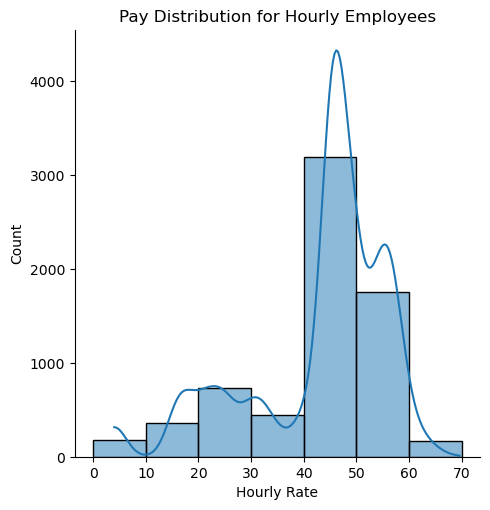

In [84]:
# Calculate maximum hourly rate, rounded to tens place, to use as bin max
binmax = round(df["Hourly Rate"].max(),-1)

# Create histogram of hourly pay rate distribution with kernel density estimate
sns.displot(df, x="Hourly Rate", kde=True, binwidth=10, binrange=(0,binmax)).set(
    title="Pay Distribution for Hourly Employees")

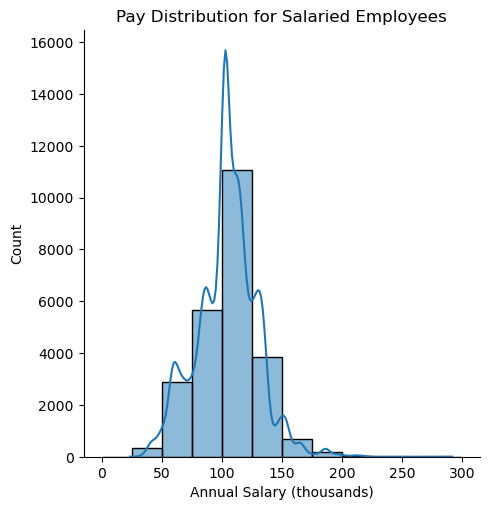

In [85]:
# Calculate maximum annual salary, rounded to hundreds of thousands, to use as bin max
binmax = round(df["Annual Salary (thousands)"].max(),-2)

# Create histogram of annual salary distribution with kernel density estimate
sns.displot(df, x="Annual Salary (thousands)", kde=True, binwidth=25, binrange=(0,binmax)).set(
    title="Pay Distribution for Salaried Employees")

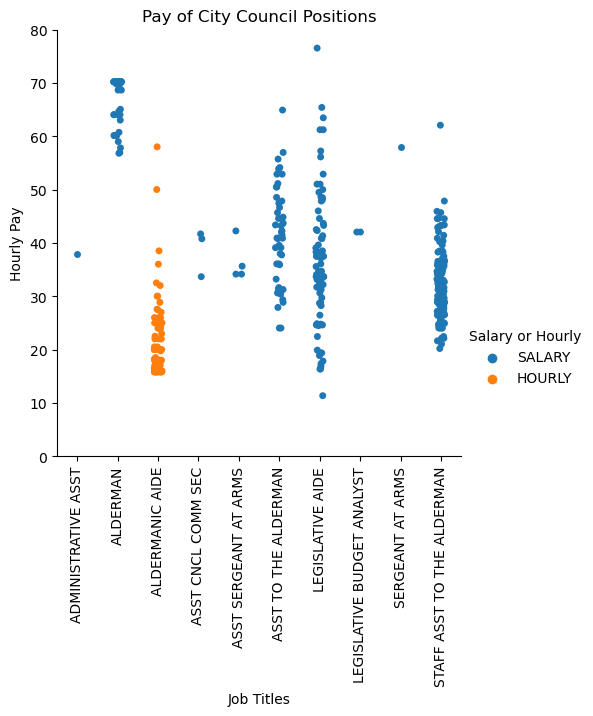

In [86]:
# Create filtered dataframe for city council employees
df_council = df.query("Department == 'CITY COUNCIL'").sort_values("Job Titles")

# Calculate maximum hourly rate, rounded to tens place, to use as y-axis max
ymax = round(df_council["Hourly Pay"].max(),-1)

# Create scatter plot of hourly pay per position
sns.catplot(data=df_council, x="Job Titles", y="Hourly Pay", hue="Salary or Hourly").set(
    title="Pay of City Council Positions")
plt.ylim(0,ymax)
plt.xticks(rotation=90)
plt.show()

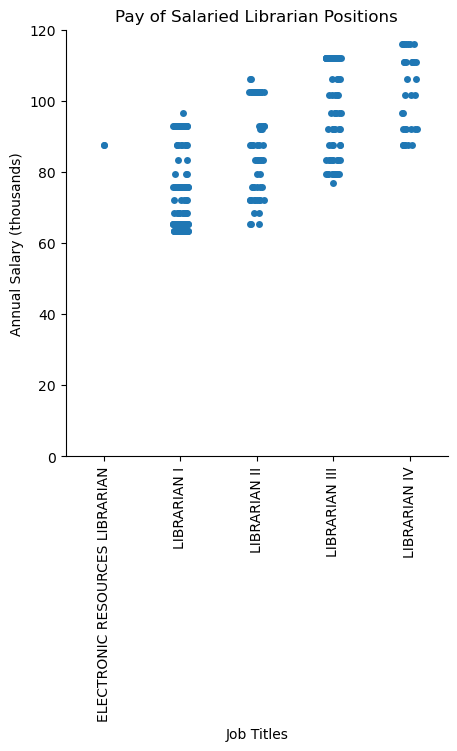

In [87]:
# Create filtered dataframe for salaried Public Library employees with Librarian in their title
df_lib = df.loc[(df["Department"] == "CHICAGO PUBLIC LIBRARY") & (df["Salary or Hourly"] == "SALARY")
                & df["Job Titles"].str.contains("LIBRARIAN")]

# Calculate maximum salary, rounded to tens of thousands, to use as y-axis max
ymax = round(df_lib["Annual Salary (thousands)"].max(),-1)

# Create scatter plot of annual salary per position
sns.catplot(data=df_lib.sort_values("Job Titles"), x="Job Titles", y="Annual Salary (thousands)").set(
    title="Pay of Salaried Librarian Positions")
plt.ylim(0,ymax)
plt.xticks(rotation=90)
plt.show()